### Teorema de Taylor

$$ f(x+d) = f(x) + d * f'(x) + o(|d|) $$

Se $f$ é diferenciável em torno de $x$. Onde $ o(|d|) = \lim_{d \rightarrow 0}{\frac{o(|d|)}{|d|}} $

Temos que, se $d$ é pequeno, $f(x) + d * f'(x)$ é uma boa aproximação para $f(x+d)$.

### Método de Newton

No lugar de tentar resolver $f(x) = 0$, escolhemos $x_0$ e resolvemos

$$ f(x_0) + d * f'(x_0) = 0 $$
$$ d = \frac{-f(x_0)}{f'(x_0)} $$

A partir daí, 

$$ x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} $$

Em geral, temos:

$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} $$

In [2]:
f(x) = x^2 - 2
fd(x) = 2x
x = 1.0

1.0

In [3]:
x = x - f(x) / fd(x)
x, f(x)

(1.5, 0.25)

In [4]:
x = x - f(x) / fd(x)
x, f(x)

(1.4166666666666667, 0.006944444444444642)

In [5]:
x = x - f(x) / fd(x)
x, f(x)

(1.4142156862745099, 6.007304882871267e-6)

In [6]:
x = x - f(x) / fd(x)
x, f(x)

(1.4142135623746899, 4.510614104447086e-12)

In [7]:
x = x - f(x) / fd(x)
x, f(x)

(1.4142135623730951, 4.440892098500626e-16)

In [8]:
x = x - f(x) / fd(x)
x, f(x)

(1.414213562373095, -4.440892098500626e-16)

In [9]:
f(x) = x^2 - 2
fd(x) = 2x
x = 1.0
x = big"1"

1

In [10]:
x = x - f(x) / fd(x)
x, f(x)

(1.5, 0.25)

In [11]:
x = x - f(x) / fd(x)
x, f(x)

(1.416666666666666666666666666666666666666666666666666666666666666666666666666661, 0.006944444444444444444444444444444444444444444444444444444444444444444444444417576)

In [12]:
x = x - f(x) / fd(x)
x, f(x)

(1.414215686274509803921568627450980392156862745098039215686274509803921568627451, 6.007304882737408688965782391387927720107650903498654363706266820453671663376355e-06)

In [13]:
x = x - f(x) / fd(x)
x, f(x)

(1.414213562374689910626295578890134910116559622115744044584905019200054371835385, 4.510950444942772099280764360710487611553552636972638583381341682774977026972629e-12)

In [14]:
x = x - f(x) / fd(x)
x, f(x)

(1.414213562373095048801689623502530243614981925776197428498289498623195824228933, 2.543584239585437205842792747002928940919398699981858849216171323264197378926519e-24)

In [15]:
x = x - f(x) / fd(x)
x, f(x)

(1.41421356237309504880168872420969807856967187537723400156101313311326525563035, 8.087275979834283525943226474966356195438464890457763565398783053640267780573221e-49)

In [16]:
x = x - f(x) / fd(x)
x, f(x)

(1.414213562373095048801688724209698078569671875376948073176679737990732478462102, -1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77)

In [17]:
"""
    (x, fx, exitflag) = newton(f, fd, x)
"""
function newton(f, fd, x;
                atol = 1e-8, rtol = 1e-8,
                max_tempo = 10.0, max_iter = 1000,
                )
    # atol = erro absoluto tolerado
    # rtol = erro relativo tolerado
    fx = f(x)
    ϵ = atol + rtol * abs(fx)
    
    # para acompanhar o número de iterações e tempo decorrido
    # não queremos que o algoritmo execute indefinidamente
    iter = 0
    t0 = time()
    Δt = time() - t0
    
    #definindo a flag de saída, pode ser necessário intemrromper o algoritmo por causa de uma divisão por zero
    exitflag = :desconhecido
    
    # critérios de parada
    # caso o valor já esteja dentro do erro aceitável
    resolvido = abs(fx) ≤ ϵ
    
    # caso não seja possível encontrar o zero em um número finito de iterações e tempo
    cansado = (iter ≥ max_iter || Δt ≥ max_tempo)
    
    # enquanto não encontrarmos o zero da função ou
    # enquanto o algoritmo não tiver exaurido suas tentativas
    # fazemos o método de newton para tentar encontrar o zero
    while !(resolvido || cansado)
        # definimos o novo ponto, dividindo pela derivada da função
        # precisamos observar os casos em que a derivada é zero ou muito próxima de zero
        fdx = fd(x)
        if abs(fdx) ≤ ϵ
            exitflag = :derivada_nula
            break
        end
        x = x - fx / fdx
        fx = f(x)
        
        # atualizamos as variáveis de controle de parada
        iter += 1
        Δt = time() - t0
        resolvido = abs(fx) ≤ ϵ
        cansado = (iter ≥ max_iter || Δt ≥ max_tempo)
    end
    
    if resolvido
        exitflag = :sucesso
    elseif cansado
        if iter ≥ max_iter
            exitflag = :max_iter
        else
            exitflag = :max_tempo
        end
    end
    
    return x, fx, exitflag
end

newton

In [18]:
f(x) = x^2 - 2
fd(x) = 2x
newton(f, fd, 1.0)

(1.4142135623746899, 4.510614104447086e-12, :sucesso)

In [19]:
f(x) = x^2 - 2
fd(x) = 2x
newton(f, fd, 0.01)

(1.4142135623738412, 2.1103119252074976e-12, :sucesso)

In [20]:
f(x) = x^2 - 2
fd(x) = 2x
newton(f, fd, 10)

(1.4142135968022693, 9.738041173434908e-8, :sucesso)

In [21]:
f(x) = x^2 - 2
fd(x) = 2x
newton(f, fd, 1e6)

(3906.2501706640614, 1.5258788395813009e7, :derivada_nula)

In [22]:
f(x) = x^2 - 2
fd(x) = 2x
newton(f, fd, -1)

(-1.4142135623746899, 4.510614104447086e-12, :sucesso)

In [23]:
f(x) = x^2 - 2
fd(x) = 2x
newton(f, fd, big"1")

(1.414213562374689910626295578890134910116559622115744044584905019200054371835385, 4.510950444942772099280764360710487611553552636972638583381341682774977026972629e-12, :sucesso)

In [24]:
f(x) = x^2 - 2
fd(x) = 2x
newton(f, fd, big"1", atol=1e-100, rtol=0.0)

(1.414213562373095048801688724209698078569671875376948073176679737990732478462102, -1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77, :max_iter)

In [25]:
f(x) = x * exp(x) - 1
fd(x) = exp(x) + x * exp(x)
newton(f, fd, 1.0)

(0.5671432965302959, 1.6912338640651114e-8, :sucesso)

In [26]:
f(x) = x * exp(x) - 1
fd(x) = exp(x) + x * exp(x)
newton(f, fd, 0.0)

(0.5671432965302959, 1.6912338640651114e-8, :sucesso)

In [27]:
f(x) = x * exp(x) - 1
fd(x) = exp(x) + x * exp(x)
newton(f, fd, 10.0)

(0.5675716938309239, 0.0011841895661757196, :sucesso)

In [28]:
f(x) = x * exp(x) - 1
fd(x) = exp(x) + x * exp(x)
newton(f, fd, big"1")

(0.5671432965302959290104061393322652388244468110017561469052367139960666960291475, 1.691233875587595489474248757251200199940003665063461356294704138872891457770491e-08, :sucesso)

In [29]:
f(x) = x * exp(x) - 1
fd(x) = exp(x) + x * exp(x)
newton(f, fd, big"1", atol=1e-100, rtol=0.0)

(0.567143290409783872999968662210355549753815787186512508135131079223045793086683, -8.636168555094444625386351862800399571116000364436281385023703470168591803162427e-78, :max_iter)

In [30]:
f(x) = x * exp(x) - 1
fd(x) = exp(x) + x * exp(x)
newton(f, fd, big"10")

(0.5675716938309239165429597954857231932474492209955884660998602417346949399472328, 0.001184189566175814961270582517827147702933326075548955649832007397577455193667032, :sucesso)

In [31]:
f(x) = x * exp(x) - 1
fd(x) = exp(x) + x * exp(x)
newton(f, fd, big"100")

(81.20702819194836415519959063960136061627607090673719446043993519013925932403688, 1.504381046281143698879649380970583843582427099092413521893199401259769446186892e+37, :sucesso)

In [32]:
# função que calcula o valor de um produto com juros

n = 48
V = 40_000
p = 1200
function eq_price(i)
    if i == 0
        return p - V / n
    else
        return p - V * (1 + i)^n * i / ((1 + i)^n - 1)
    end
end

eq_price (generic function with 1 method)

In [33]:
import Pkg;
Pkg.add("ForwardDiff")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100,0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [34]:
using ForwardDiff

eq_price_der(i) = ForwardDiff.derivative(eq_price, i)
newton(eq_price, eq_price_der, 0.0)

(0.0, 366.66666666666663, :derivada_nula)

In [35]:
using ForwardDiff

eq_price_der(i) = ForwardDiff.derivative(eq_price, i)
newton(eq_price, eq_price_der, 1.0)

(0.015990923866072523, -3.1130025490710977e-6, :sucesso)

In [36]:
using ForwardDiff

eq_price_der(i) = ForwardDiff.derivative(eq_price, i)
newton(eq_price, eq_price_der, 10.0)

(0.01599092386607231, -3.112997546850238e-6, :sucesso)

In [37]:
using ForwardDiff

eq_price_der(i) = ForwardDiff.derivative(eq_price, i)
newton(eq_price, eq_price_der, big"1")

(0.01599092386607239990622635930974996268032599445302884795666690582986084557250656, -3.112997471802221524280961916765101419316947270040787511395299895674483960559086e-06, :sucesso)

In [38]:
using ForwardDiff

eq_price_der(i) = ForwardDiff.derivative(eq_price, i)
newton(eq_price, eq_price_der, big"10")

(0.01599092386607239991129660474208713990874384918227487292626758682455764927476161, -3.112997471930881497060831607075488882233818774940930802435930628781587240474944e-06, :sucesso)

### Fractal de $x^3 - x$

In [39]:
using Plots
gr(size=(600,400))

Plots.GRBackend()

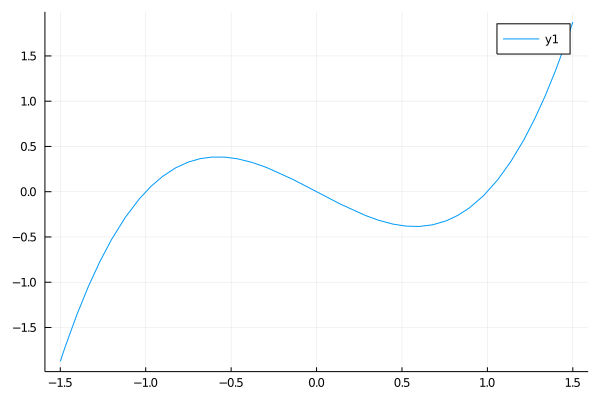

In [40]:
f(x) = x^3 - x
fd(x) = 3x^2 - 1
plot(f, -1.5, 1.5)

┌ Info: Saved animation to 
│   fn = /home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo.gif
└ @ Plots /home/daniel/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo.gif")
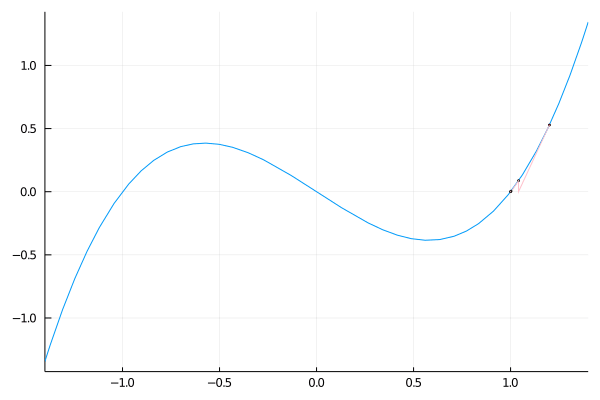

In [42]:
f(x) = x^3 - x
fd(x) = 3x^2 - 1

anim = Animation()
for x = 1.2:0.01:1.4
    plot(f, -1.4, 1.4, leg=false)
    scatter!([x], [f(x)], c=:red, ms=2)

    for k = 1:3
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end

    xlims!(-1.4, 1.4)
    frame(anim)
end
gif(anim, "exemplo.gif", fps=10)

┌ Info: Saved animation to 
│   fn = /home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo2.gif
└ @ Plots /home/daniel/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo2.gif")
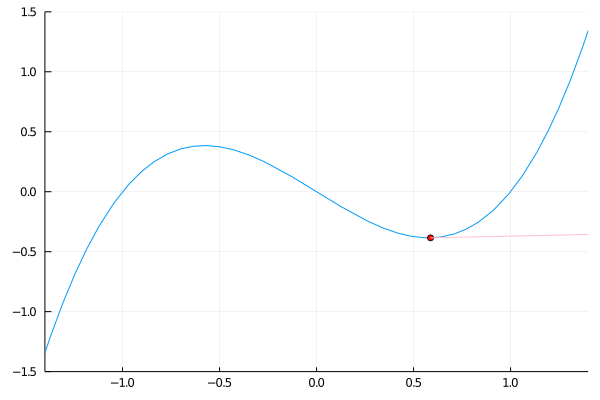

In [43]:
f(x) = x^3 - x
fd(x) = 3x^2 - 1

anim = Animation()
for x = sqrt(3) / 3 + 1e-2:0.01:1.4
    plot(f, -1.4, 1.4, leg=false)
    scatter!([x], [f(x)], c=:red, ms=4)

    for k = 1:3
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end

    xlims!(-1.4, 1.4)
    ylims!(-1.5, 1.5)
    frame(anim)
end
gif(anim, "exemplo2.gif", fps=10)

┌ Info: Saved animation to 
│   fn = /home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo3.gif
└ @ Plots /home/daniel/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo3.gif")
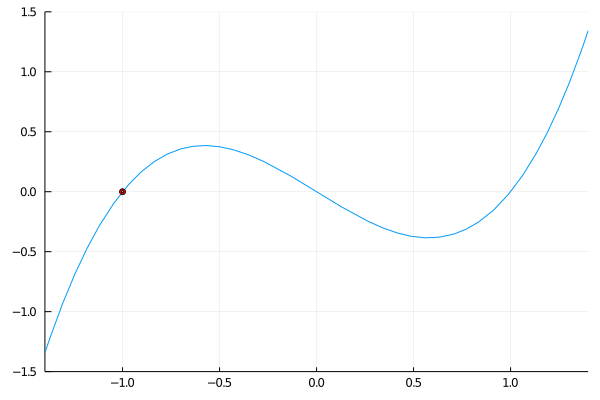

In [44]:
f(x) = x^3 - x
fd(x) = 3x^2 - 1

anim = Animation()
for x = -1.0:0.01:1.0
    plot(f, -1.4, 1.4, leg=false)
    scatter!([x], [f(x)], c=:red, ms=4)

    for k = 1:3
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end

    xlims!(-1.4, 1.4)
    ylims!(-1.5, 1.5)
    frame(anim)
end
gif(anim, "exemplo3.gif", fps=10)

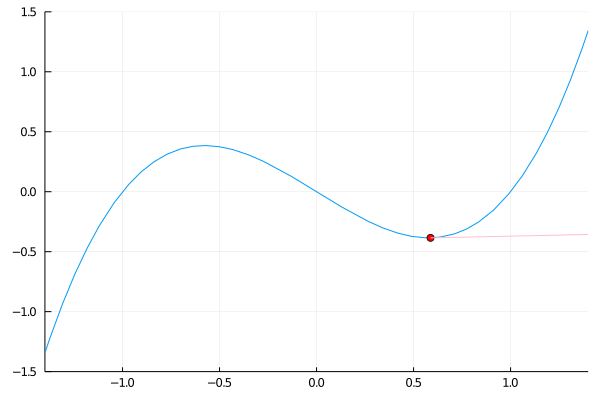

In [45]:
x = sqrt(3) / 3 + 1e-2

plot(f, -1.4, 1.4, leg=false)
scatter!([x], [f(x)], c=:red, ms=4)

for k = 1:3
    xp = x - f(x) / fd(x)
    plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
    scatter!([xp], [f(xp)], c=:pink, ms=2)
    x = xp
end

xlims!(-1.4, 1.4)
ylims!(-1.5, 1.5)

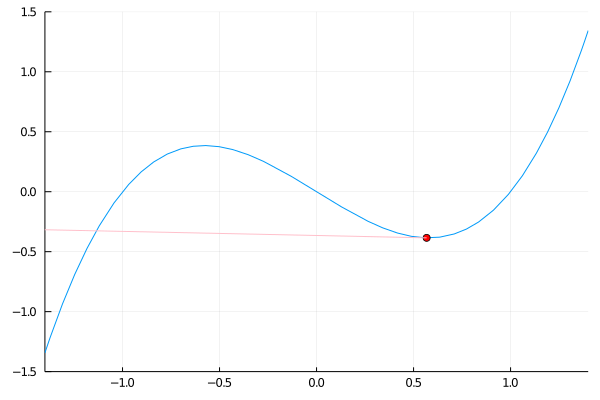

In [46]:
x = sqrt(3) / 3 - 1e-2

plot(f, -1.4, 1.4, leg=false)
scatter!([x], [f(x)], c=:red, ms=4)

for k = 1:3
    xp = x - f(x) / fd(x)
    plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
    scatter!([xp], [f(xp)], c=:pink, ms=2)
    x = xp
end

xlims!(-1.4, 1.4)
ylims!(-1.5, 1.5)

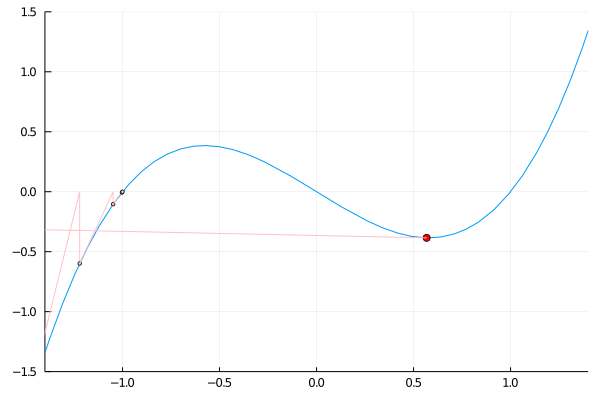

In [47]:
x = sqrt(3) / 3 - 1e-2

plot(f, -1.4, 1.4, leg=false)
scatter!([x], [f(x)], c=:red, ms=4)

for k = 1:10
    xp = x - f(x) / fd(x)
    plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
    scatter!([xp], [f(xp)], c=:pink, ms=2)
    x = xp
end

xlims!(-1.4, 1.4)
ylims!(-1.5, 1.5)

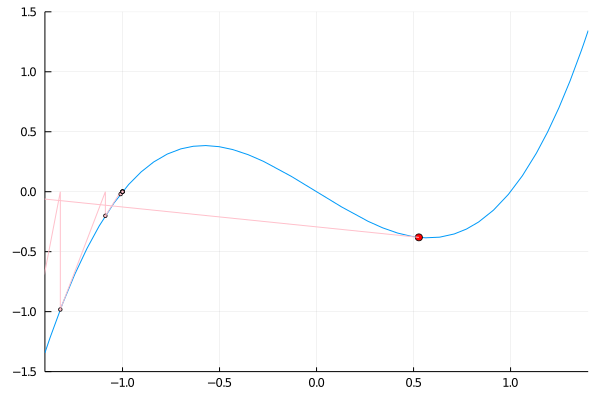

In [48]:
x = sqrt(3) / 3 - 0.05

plot(f, -1.4, 1.4, leg=false)
scatter!([x], [f(x)], c=:red, ms=4)

for k = 1:10
    xp = x - f(x) / fd(x)
    plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
    scatter!([xp], [f(xp)], c=:pink, ms=2)
    x = xp
end

xlims!(-1.4, 1.4)
ylims!(-1.5, 1.5)

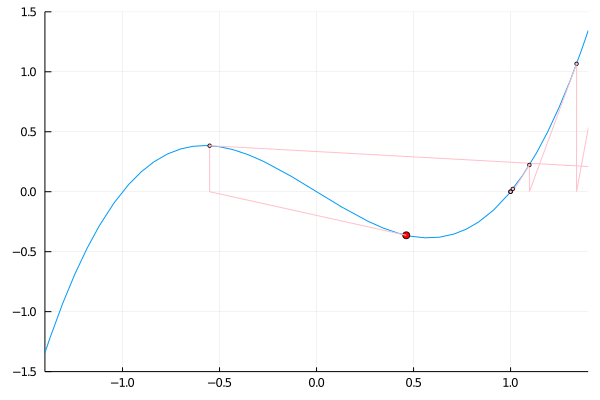

In [49]:
x = sqrt(3) / 3 - 0.115

plot(f, -1.4, 1.4, leg=false)
scatter!([x], [f(x)], c=:red, ms=4)

for k = 1:10
    xp = x - f(x) / fd(x)
    plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
    scatter!([xp], [f(xp)], c=:pink, ms=2)
    x = xp
end

xlims!(-1.4, 1.4)
ylims!(-1.5, 1.5)

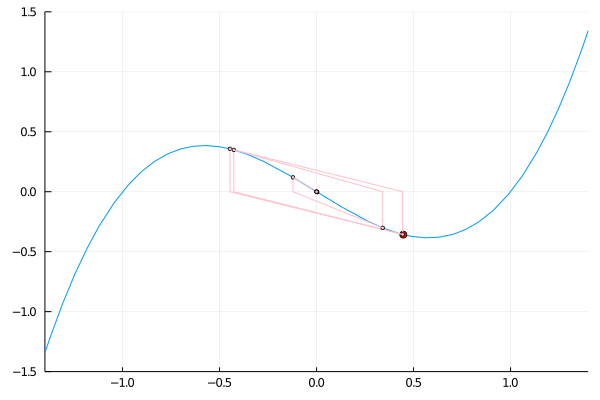

In [50]:
x = sqrt(5) / 5 - 1e-4

plot(f, -1.4, 1.4, leg=false)
scatter!([x], [f(x)], c=:red, ms=4)

for k = 1:10
    xp = x - f(x) / fd(x)
    plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
    scatter!([xp], [f(xp)], c=:pink, ms=2)
    x = xp
end

xlims!(-1.4, 1.4)
ylims!(-1.5, 1.5)

┌ Info: Saved animation to 
│   fn = /home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo4.gif
└ @ Plots /home/daniel/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo4.gif")
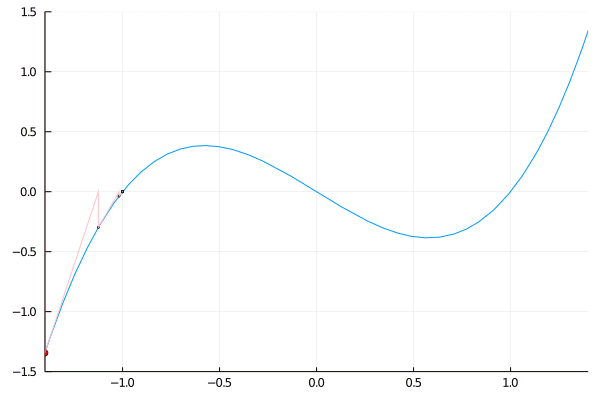

In [51]:
f(x) = x^3 - x
fd(x) = 3x^2 - 1

anim = Animation()
X = []
C = []
colors = [:red, :green, :blue]

for x = -1.4:0.01:1.4
    plot(f, -1.4, 1.4, leg=false)
    scatter!([x], [f(x)], c=:red, ms=4)
    push!(X,x)

    for k = 1:10
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end
    
    j = argmin(abs.(x .-[-1, 0, 1]))
    push!(C, colors[j])
    
    for (xi, ci) in zip(X,C)
        plot!([xi, xi], [-1.5, 1.5], c=ci)
    end

    xlims!(-1.4, 1.4)
    ylims!(-1.5, 1.5)
    frame(anim)
end
gif(anim, "exemplo4.gif", fps=10)

┌ Info: Saved animation to 
│   fn = /home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo4.gif
└ @ Plots /home/daniel/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo4.gif")
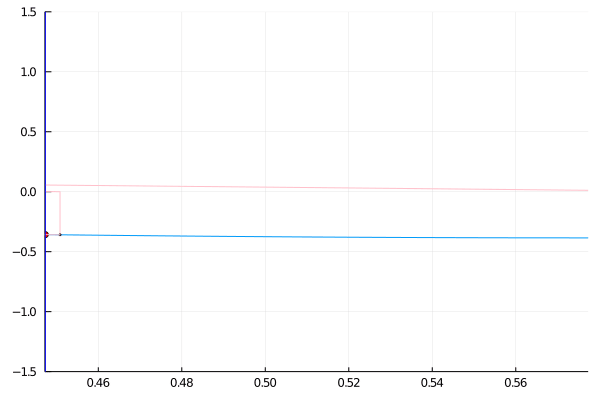

In [52]:
f(x) = x^3 - x
fd(x) = 3x^2 - 1

anim = Animation()
X = []
C = []
colors = [:red, :green, :blue]
r0 = sqrt(5) / 5
rf = sqrt(3) / 3
I = r0 .+ exp.(range(log(1e-4), log(rf - r0 - 1e-4), length=50))

for x = I
    plot(f, r0, rf, leg=false)
    scatter!([x], [f(x)], c=:red, ms=4)
    push!(X,x)

    for k = 1:10
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end
    
    j = argmin(abs.(x .-[-1, 0, 1]))
    push!(C, colors[j])
    
    for (xi, ci) in zip(X,C)
        plot!([xi, xi], [-1.5, 1.5], c=ci)
    end

    xlims!(r0, rf)
    ylims!(-1.5, 1.5)
    frame(anim)
end
gif(anim, "exemplo4.gif", fps=10)

┌ Info: Saved animation to 
│   fn = /home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo4.gif
└ @ Plots /home/daniel/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo4.gif")
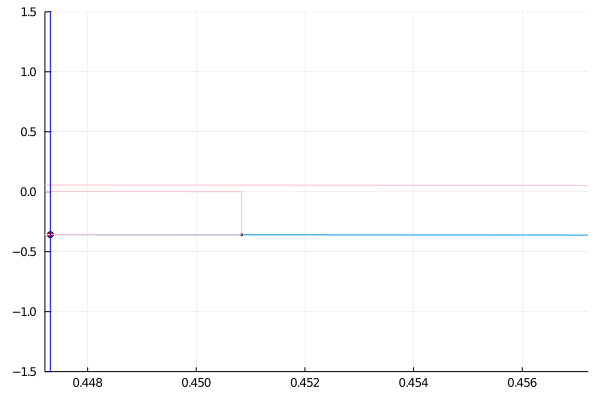

In [53]:
f(x) = x^3 - x
fd(x) = 3x^2 - 1

anim = Animation()
X = []
C = []
colors = [:red, :green, :blue]
r0 = sqrt(5) / 5
rf = r0 + 0.01
I = r0 .+ exp.(range(log(1e-4), log(rf - r0 - 1e-4), length=50))

for x = I
    plot(f, r0, rf, leg=false)
    scatter!([x], [f(x)], c=:red, ms=4)
    push!(X,x)

    for k = 1:10
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end
    
    j = argmin(abs.(x .-[-1, 0, 1]))
    push!(C, colors[j])
    
    for (xi, ci) in zip(X,C)
        plot!([xi, xi], [-1.5, 1.5], c=ci)
    end

    xlims!(r0, rf)
    ylims!(-1.5, 1.5)
    frame(anim)
end
gif(anim, "exemplo4.gif", fps=10)

┌ Info: Saved animation to 
│   fn = /home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo4.gif
└ @ Plots /home/daniel/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo4.gif")
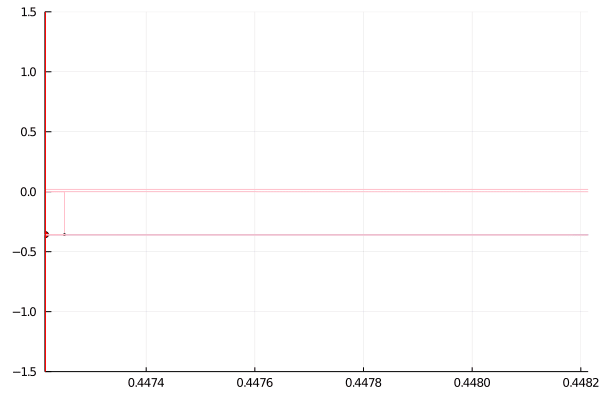

In [54]:
f(x) = x^3 - x
fd(x) = 3x^2 - 1

anim = Animation()
X = []
C = []
colors = [:red, :green, :blue]
r0 = sqrt(5) / 5
rf = r0 + 0.001
I = r0 .+ exp.(range(log(1e-6), log(rf - r0 - 1e-4), length=100))

for x = I
    plot(f, r0, rf, leg=false)
    scatter!([x], [f(x)], c=:red, ms=4)
    push!(X,x)

    for k = 1:10
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end
    
    j = argmin(abs.(x .-[-1, 0, 1]))
    push!(C, colors[j])
    
    for (xi, ci) in zip(X,C)
        plot!([xi, xi], [-1.5, 1.5], c=ci)
    end

    xlims!(r0, rf)
    ylims!(-1.5, 1.5)
    frame(anim)
end
gif(anim, "exemplo4.gif", fps=10)

┌ Info: Saved animation to 
│   fn = /home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo5.gif
└ @ Plots /home/daniel/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo5.gif")
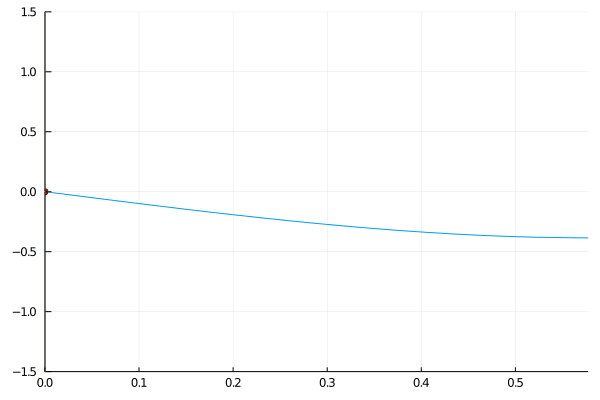

In [55]:
f(x) = x^3 - x
fd(x) = 3x^2 - 1

anim = Animation()
X = []
C = []
colors = [:red, :green, :blue]
r0 = 0
rf = sqrt(3) / 3
I = r0 .+ log.(range(exp(1e-4), exp(rf - r0 - 1e-4), length=100))

for x = I
    plot(f, r0, rf, leg=false)
    scatter!([x], [f(x)], c=:red, ms=4)
    push!(X,x)

    for k = 1:10
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end
    
    j = argmin(abs.(x .-[-1, 0, 1]))
    push!(C, colors[j])
    
    for (xi, ci) in zip(X,C)
        plot!([xi, xi], [-1.5, 1.5], c=ci)
    end

    xlims!(r0, rf)
    ylims!(-1.5, 1.5)
    frame(anim)
end
gif(anim, "exemplo5.gif", fps=10)

┌ Info: Saved animation to 
│   fn = /home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo6.gif
└ @ Plots /home/daniel/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/daniel/Documentos/UFRJ/Cálculo Numérico/Notebooks/exemplo6.gif")
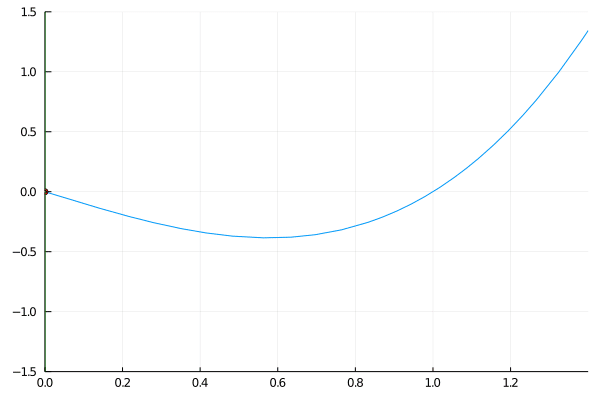

In [56]:
f(x) = x^3 - x
fd(x) = 3x^2 - 1

anim = Animation()
X = []
C = []
colors = [:red, :green, :blue]
r0 = 0
rf = 1.4
I = r0 .+ log.(range(exp(1e-4), exp(rf - r0 - 1e-4), length=100))

for x = I
    plot(f, r0, rf, leg=false)
    scatter!([x], [f(x)], c=:red, ms=4)
    push!(X,x)

    for k = 1:10
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end
    
    j = argmin(abs.(x .-[-1, 0, 1]))
    push!(C, colors[j])
    
    for (xi, ci) in zip(X,C)
        plot!([xi, xi], [-1.5, 1.5], c=ci)
    end

    xlims!(r0, rf)
    ylims!(-1.5, 1.5)
    frame(anim)
end
gif(anim, "exemplo6.gif", fps=10)